___
# Exercício: <p> <center> Análise Exploratória - Associação entre duas Variáveis Quantitativas
___

## Aula 09

___
<div id="indice"></div>

## Índice

- [Discriminação Salarial](#discriminacao-salarial)
    - [Exercício 1](#ex1) **- APS5 disponível no Blackboard**
    - [Exercício 2](#ex2) 
    - [Exercício 3](#ex3) **- APS5 disponível no Blackboard**
    - [Exercício 4](#ex4) **- APS5 disponível no Blackboard**
    - [Exercício 5](#ex5) **- APS5 disponível no Blackboard**
    - [Exercício 6](#ex6) **- APS5 disponível no Blackboard**
    - [Exercício 7](#ex7)
    - [Exercício 8](#ex8)
    - [Exercício 9 [EXTRA]](#ex9)
    - [Exercício 10 [EXTRA]](#ex10)
    - [Exercício 11 [EXTRA]](#ex11)

In [39]:
#%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/home/vitorhideki/www/python/cdados/exercicios


___
<div id="discriminacao-salarial"></div>

# Discriminação Salarial

<img src="disparidade-salarial.jpg" height="400">

Fonte: extraído da internet

Uma empresa está sendo **acusada de pagar um salário maior para os homens do que para as mulheres**. 
Para justificar a acusação, apresentou-se uma lista de salários de uma amostra de funcionários. 
**Essa empresa tem motivos para se preocupar?**

A base de dados `Discriminação.xlsx` apresenta, para cada funcionário, as variáveis:

1. Sexo: `'fem'` ou `'masc'`;
2. Anos: anos no emprego; e 
3. Salario: remuneração mensal, em milhares de reais. 


In [40]:
dados = pd.read_excel('Discriminacao.xlsx')

In [41]:
dados

,Sexo,Anos,Salario
0,fem,9,39
1,fem,6,36
2,fem,10,40
3,fem,0,24
4,fem,9,36
...,...,...,...
62,masc,10,29
63,masc,0,27
64,masc,11,31
65,masc,2,24


___

<div id="ex1"></div>

### EXERCÍCIO 1:

Vamos começar com uma análise descritiva utilizando as ferramentas estatísticas e computacionais que vimos até o momento. Faça essa análise com olhar na preocupação da empresa. Imprima as medidas resumo de posição (média, quartis, máximo, mínimo) e de dispersão (desvio padrão) para o `Salario` dos seguintes grupos:

1. Conjunto de dados inteiro
2. Somente mulheres
3. Somente homens

**Preencha os valores das 3 médias na questão 1 da APS5, no Blackboard**.

In [42]:
dados['Salario'].describe()

count    67.000000
mean     38.343284
std      10.221119
min      22.000000
25%      31.000000
50%      37.000000
75%      42.000000
max      69.000000
Name: Salario, dtype: float64

In [43]:
dados.loc[dados['Sexo'] == 'fem', ['Salario']].describe()

,Salario
count,32.000000
mean,35.468750
std,7.422652
min,22.000000
25%,29.750000
50%,35.000000
75%,40.000000
max,52.000000


In [44]:
dados.loc[dados['Sexo'] == 'masc', ['Salario']].describe()

,Salario
count,35.000000
mean,40.971429
std,11.733526
min,24.000000
25%,33.000000
50%,39.000000
75%,47.000000
max,69.000000


<div id="ex2"></div>

### EXERCÍCIO 2:

Baseando-se nos resultados acima, que indícios você pode formular quanto a suspeita de que a empresa está pagando salários mais baixos às mulheres?

<div id="ex3"></div>

### EXERCÍCIO 3:

Calcule os coeficientes de covariância entre as variáveis `Anos` e `Salario` para as mulheres e para os homens, separadamente. **Preencha os dois valores na questão 2 da APS5, no Blackboard**.

In [45]:
cov_fem = dados.loc[dados['Sexo'] == 'fem', ['Anos']].Anos.cov(dados.loc[dados['Sexo'] == 'fem', ['Salario']].Salario)
cov_fem

28.933467741935484

In [46]:
cov_masc = dados.loc[dados['Sexo'] == 'masc', ['Anos']].Anos.cov(dados.loc[dados['Sexo'] == 'masc', ['Salario']].Salario)
cov_masc

61.4781512605042

<div id="ex4"></div>

### EXERCÍCIO 4:

Baseando-se nos **coeficientes de covariância** acima, você pode concluir que (indique todas as opções corretas):

<ol style="list-style-type: upper-alpha;">
    <li>Existe uma associação linear <b>negativa</b> entre os <code>Anos</code> na empresa e o <code>Salario</code> das mulheres</li>
    <li>Existe uma associação linear <b>negativa</b> entre os <code>Anos</code> na empresa e o <code>Salario</code> dos homens</li>
    <li>Existe uma associação linear <b>positiva</b> entre os <code>Anos</code> na empresa e o <code>Salario</code> das mulheres</li>
    <li>Existe uma associação linear <b>positiva</b> entre os <code>Anos</code> na empresa e o <code>Salario</code> dos homens</li>
    <li>Existe uma associação linear <b>fraca</b> entre os <code>Anos</code> na empresa e o <code>Salario</code> das mulheres</li>
    <li>Existe uma associação linear <b>fraca</b> entre os <code>Anos</code> na empresa e o <code>Salario</code> dos homens</li>
    <li>Existe uma associação linear <b>moderada/forte</b> entre os <code>Anos</code> na empresa e o <code>Salario</code> das mulheres</li>
    <li>Existe uma associação linear <b>moderada/forte</b> entre os <code>Anos</code> na empresa e o <code>Salario</code> dos homens</li>
</ol>

**Indique sua resposta na questão 3 da APS5, no Blackboard.**

C, D

<div id="ex5"></div>

### EXERCÍCIO 5:

Calcule os coeficientes de correlação linear entre as variáveis `Anos` e `Salario` para as mulheres e para os homens, separadamente. **Preencha os dois valores na questão 4 da APS5, no Blackboard**.

In [47]:
corr_fem = dados.loc[dados['Sexo'] == 'fem', ['Anos']].Anos.corr(dados.loc[dados['Sexo'] == 'fem', ['Salario']].Salario)
corr_fem

0.8022389898226462

In [48]:
corr_masc = dados.loc[dados['Sexo'] == 'masc', ['Anos']].Anos.corr(dados.loc[dados['Sexo'] == 'masc', ['Salario']].Salario)
corr_masc

0.6739986401774645

<div id="ex6"></div>

### EXERCÍCIO 6:

Baseando-se nos **coeficientes de correlação linear** acima, você pode concluir que (indique todas as opções corretas):

<ol style="list-style-type: upper-alpha;">
    <li>Existe uma associação linear <b>negativa</b> entre os <code>Anos</code> na empresa e o <code>Salario</code> das mulheres</li>
    <li>Existe uma associação linear <b>negativa</b> entre os <code>Anos</code> na empresa e o <code>Salario</code> dos homens</li>
    <li>Existe uma associação linear <b>positiva</b> entre os <code>Anos</code> na empresa e o <code>Salario</code> das mulheres</li>
    <li>Existe uma associação linear <b>positiva</b> entre os <code>Anos</code> na empresa e o <code>Salario</code> dos homens</li>
    <li>Existe uma associação linear <b>fraca</b> entre os <code>Anos</code> na empresa e o <code>Salario</code> das mulheres</li>
    <li>Existe uma associação linear <b>fraca</b> entre os <code>Anos</code> na empresa e o <code>Salario</code> dos homens</li>
    <li>Existe uma associação linear <b>moderada/forte</b> entre os <code>Anos</code> na empresa e o <code>Salario</code> das mulheres</li>
    <li>Existe uma associação linear <b>moderada/forte</b> entre os <code>Anos</code> na empresa e o <code>Salario</code> dos homens</li>
</ol>

**Indique sua resposta na questão 5 da APS5, no Blackboard.**

C, D, G, H

<div id="ex7"></div>

### EXERCÍCIO 7:

Gere os gráficos de dispersão de anos na empresa versus salário mensal para as mulheres e para os homens. Utilize cores diferentes para cada grupo e gere o gráfico em **uma figura única**.

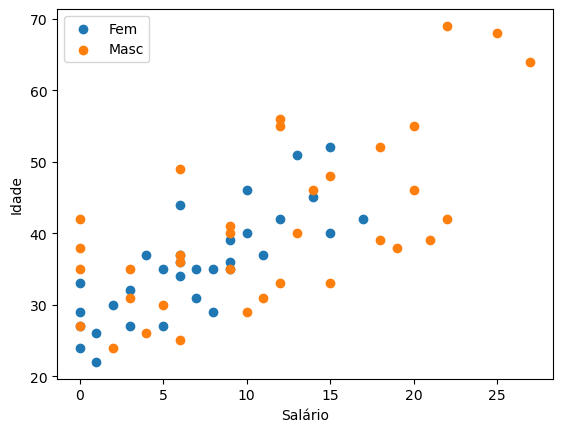

In [49]:
idade_fem = dados.loc[dados['Sexo'] == 'fem', ['Anos']]
salario_fem = dados.loc[dados['Sexo'] == 'fem', ['Salario']]
idade_masc = dados.loc[dados['Sexo'] == 'masc', ['Anos']]
salario_masc = dados.loc[dados['Sexo'] == 'masc', ['Salario']]

plt.scatter(idade_fem, salario_fem)
plt.scatter(idade_masc, salario_masc)
plt.ylabel('Idade')
plt.xlabel('Salário')
plt.legend(['Fem', 'Masc'])
plt.show()

<div id="ex8"></div>

### EXERCÍCIO 8:

Como as informações do gráfico acima se relacionam às suas hipóteses no [exercício 2](#ex2)? Você mudaria a sua opinião quanto à suspeita de discriminação salarial? Explique.

<div id="ex9"></div>

### EXERCÍCIO 9 [EXTRA]:

Vamos analisar os dados divididos por faixas de anos na empresa. Crie uma nova coluna `'Faixa'` em `dados` contendo as faixas de anos na empresa. Divida a variável `Anos` em tantas faixas necessárias necessárias para iniciar em 0 (inclusive) e terminar em 30 (exclusive) com amplitude das faixas de 3 anos. *Dica: use a função `pd.cut` e altere alguns argumentos dessa função*.


In [52]:
faixas = pd.cut(dados['Anos'], 30, 3)

dados['Faixa'] = faixas

<div id="ex10"></div>

### EXERCÍCIO 10 &#x2605;&#x2605;&#x2605; [EXTRA]:

Imprima as mesmas estatísticas do [exercício 1](#ex1) (salários de todas as pessoas da base de dados, salários das mulheres e salários dos homens), mas agora agrupando por `Faixa`. Dica: use a função `.groupby` de um `DataFrame`.

In [61]:
dados['Salario'].groupby(dados['Faixa']).describe()

,count,mean,std,min,25%,50%,75%,max
Faixa,,,,,,,,
"(-0.027, 0.9]",8.0,31.875000,6.197638,24.0,27.00,31.0,35.75,42.0
"(0.9, 1.8]",2.0,24.000000,2.828427,22.0,23.00,24.0,25.00,26.0
"(1.8, 2.7]",2.0,27.000000,4.242641,24.0,25.50,27.0,28.50,30.0
"(2.7, 3.6]",4.0,31.250000,3.304038,27.0,30.00,31.5,32.75,35.0
"(3.6, 4.5]",2.0,31.500000,7.778175,26.0,28.75,31.5,34.25,37.0
"(4.5, 5.4]",3.0,30.666667,4.041452,27.0,28.50,30.0,32.50,35.0
"(5.4, 6.3]",8.0,37.250000,7.045769,25.0,35.50,36.5,38.75,49.0
"(6.3, 7.2]",2.0,33.000000,2.828427,31.0,32.00,33.0,34.00,35.0
"(7.2, 8.1]",2.0,32.000000,4.242641,29.0,30.50,32.0,33.50,35.0


In [59]:
dados.loc[dados['Sexo'] == 'fem', ['Salario']].groupby(dados['Faixa']).describe()

Salario                                                     
                count       mean       std   min    25%   50%    75%   max
Faixa                                                                     
(-0.027, 0.9]     4.0  28.250000  3.774917  24.0  26.25  28.0  30.00  33.0
(0.9, 1.8]        2.0  24.000000  2.828427  22.0  23.00  24.0  25.00  26.0
(1.8, 2.7]        1.0  30.000000       NaN  30.0  30.00  30.0  30.00  30.0
(2.7, 3.6]        2.0  29.500000  3.535534  27.0  28.25  29.5  30.75  32.0
(3.6, 4.5]        1.0  37.000000       NaN  37.0  37.00  37.0  37.00  37.0
(4.5, 5.4]        2.0  31.000000  5.656854  27.0  29.00  31.0  33.00  35.0
(5.4, 6.3]        4.0  37.750000  4.349329  34.0  35.50  36.5  38.75  44.0
(6.3, 7.2]        2.0  33.000000  2.828427  31.0  32.00  33.0  34.00  35.0
(7.2, 8.1]        2.0  32.000000  4.242641  29.0  30.50  32.0  33.50  35.0
(8.1, 9.0]        3.0  36.666667  2.081666  35.0  35.50  36.0  37.50  39.0
(9.0, 9.9]        0.0        NaN       NaN   NaN    NaN   NaN    NaN   NaN
(9.9, 10.8]       2.0  43.000000  4.242641  40.0  41.50  43.0  44.50  46.0
(10.8, 11.7]      1.0  37.000000       NaN  37.0  37.00  37.0  37.00  37.0
(11.7, 12.6]      1.0  42.000000       NaN  42.0  42.00  42.0  42.00  42.0
(12.6, 13.5]      1.0  51.000000       NaN  51.0  51.00  51.0  51.00  51.0
(13.5, 14.4]      1.0  45.000000       NaN  45.0  45.00  45.0  45.00  45.0
(14.4, 15.3]      2.0  46.000000  8.485281  40.0  43.00  46.0  49.00  52.0
(15.3, 16.2]      0.0        NaN       NaN   NaN    NaN   NaN    NaN   NaN
(16.2, 17.1]      1.0  42.000000       NaN  42.0  42.00  42.0  42.00  42.0
(17.1, 18.0]      0.0        NaN       NaN   NaN    NaN   NaN    NaN   NaN
(18.0, 18.9]      0.0        NaN       NaN   NaN    NaN   NaN    NaN   NaN
(18.9, 19.8]      0.0        NaN       NaN   NaN    NaN   NaN    NaN   NaN
(19.8, 20.7]      0.0        NaN       NaN   NaN    NaN   NaN    NaN   NaN
(20.7, 21.6]      0.0        NaN       NaN   NaN    NaN   NaN    NaN   NaN
(21.6, 22.5]      0.0        NaN       NaN   NaN    NaN   NaN    NaN   NaN
(22.5, 23.4]      0.0        NaN       NaN   NaN    NaN   NaN    NaN   NaN
(23.4, 24.3]      0.0        NaN       NaN   NaN    NaN   NaN    NaN   NaN
(24.3, 25.2]      0.0        NaN       NaN   NaN    NaN   NaN    NaN   NaN
(25.2, 26.1]      0.0        NaN       NaN   NaN    NaN   NaN    NaN   NaN
(26.1, 27.0]      0.0        NaN       NaN   NaN    NaN   NaN    NaN   NaN

In [60]:
dados.loc[dados['Sexo'] == 'masc', ['Salario']].groupby(dados['Faixa']).describe()

Salario                                                      
                count       mean        std   min    25%   50%    75%   max
Faixa                                                                      
(-0.027, 0.9]     4.0  35.500000   6.350853  27.0  33.00  36.5  39.00  42.0
(0.9, 1.8]        0.0        NaN        NaN   NaN    NaN   NaN    NaN   NaN
(1.8, 2.7]        1.0  24.000000        NaN  24.0  24.00  24.0  24.00  24.0
(2.7, 3.6]        2.0  33.000000   2.828427  31.0  32.00  33.0  34.00  35.0
(3.6, 4.5]        1.0  26.000000        NaN  26.0  26.00  26.0  26.00  26.0
(4.5, 5.4]        1.0  30.000000        NaN  30.0  30.00  30.0  30.00  30.0
(5.4, 6.3]        4.0  36.750000   9.810708  25.0  33.25  36.5  40.00  49.0
(6.3, 7.2]        0.0        NaN        NaN   NaN    NaN   NaN    NaN   NaN
(7.2, 8.1]        0.0        NaN        NaN   NaN    NaN   NaN    NaN   NaN
(8.1, 9.0]        3.0  38.666667   3.214550  35.0  37.50  40.0  40.50  41.0
(9.0, 9.9]        0.0        NaN        NaN   NaN    NaN   NaN    NaN   NaN
(9.9, 10.8]       1.0  29.000000        NaN  29.0  29.00  29.0  29.00  29.0
(10.8, 11.7]      1.0  31.000000        NaN  31.0  31.00  31.0  31.00  31.0
(11.7, 12.6]      3.0  48.000000  13.000000  33.0  44.00  55.0  55.50  56.0
(12.6, 13.5]      1.0  40.000000        NaN  40.0  40.00  40.0  40.00  40.0
(13.5, 14.4]      1.0  46.000000        NaN  46.0  46.00  46.0  46.00  46.0
(14.4, 15.3]      2.0  40.500000  10.606602  33.0  36.75  40.5  44.25  48.0
(15.3, 16.2]      0.0        NaN        NaN   NaN    NaN   NaN    NaN   NaN
(16.2, 17.1]      0.0        NaN        NaN   NaN    NaN   NaN    NaN   NaN
(17.1, 18.0]      2.0  45.500000   9.192388  39.0  42.25  45.5  48.75  52.0
(18.0, 18.9]      0.0        NaN        NaN   NaN    NaN   NaN    NaN   NaN
(18.9, 19.8]      1.0  38.000000        NaN  38.0  38.00  38.0  38.00  38.0
(19.8, 20.7]      2.0  50.500000   6.363961  46.0  48.25  50.5  52.75  55.0
(20.7, 21.6]      1.0  39.000000        NaN  39.0  39.00  39.0  39.00  39.0
(21.6, 22.5]      2.0  55.500000  19.091883  42.0  48.75  55.5  62.25  69.0
(22.5, 23.4]      0.0        NaN        NaN   NaN    NaN   NaN    NaN   NaN
(23.4, 24.3]      0.0        NaN        NaN   NaN    NaN   NaN    NaN   NaN
(24.3, 25.2]      1.0  68.000000        NaN  68.0  68.00  68.0  68.00  68.0
(25.2, 26.1]      0.0        NaN        NaN   NaN    NaN   NaN    NaN   NaN
(26.1, 27.0]      1.0  64.000000        NaN  64.0  64.00  64.0  64.00  64.0

<div id="ex11"></div>

### EXERCÍCIO 11 [EXTRA]:

O resultado acima dá indícios para confirmar ou rejeitar a sua hipótese do [exercício 8](#ex8)?